#Task 1: Exploratory Data Analysis (EDA)
* Dataset Overview: We first load the Toyota Corolla dataset and display the first few rows to understand the structure of the data.
* Summary Statistics: Provides a statistical summary of the numerical features, such as the mean, median, and standard deviation.
* Missing Values: We check for any missing data that needs to be handled before moving forward.
* Histograms: Visualize the distribution of each numerical feature to understand how the values are spread across the dataset.
* Correlation Heatmap: This heatmap helps us identify relationships between the numerical variables, such as how strongly different features (e.g., age and price) are correlated.


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

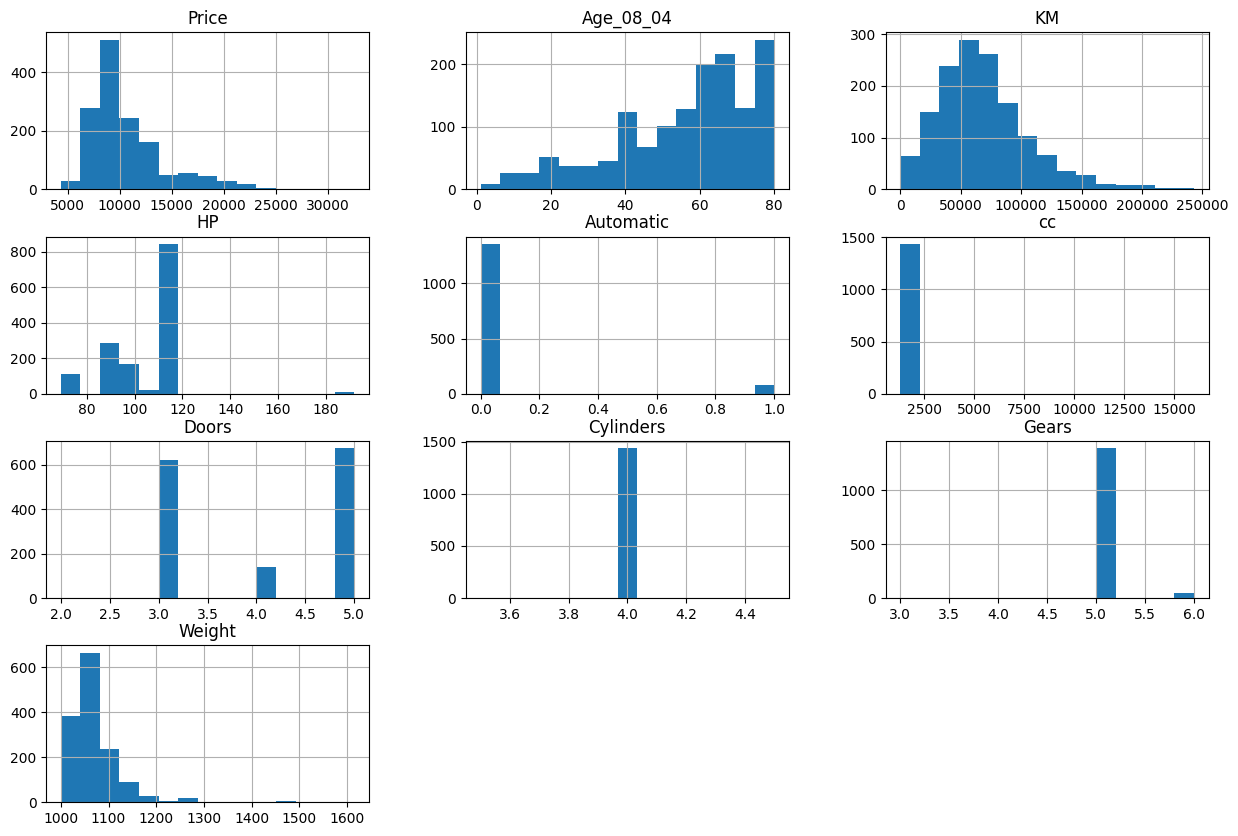

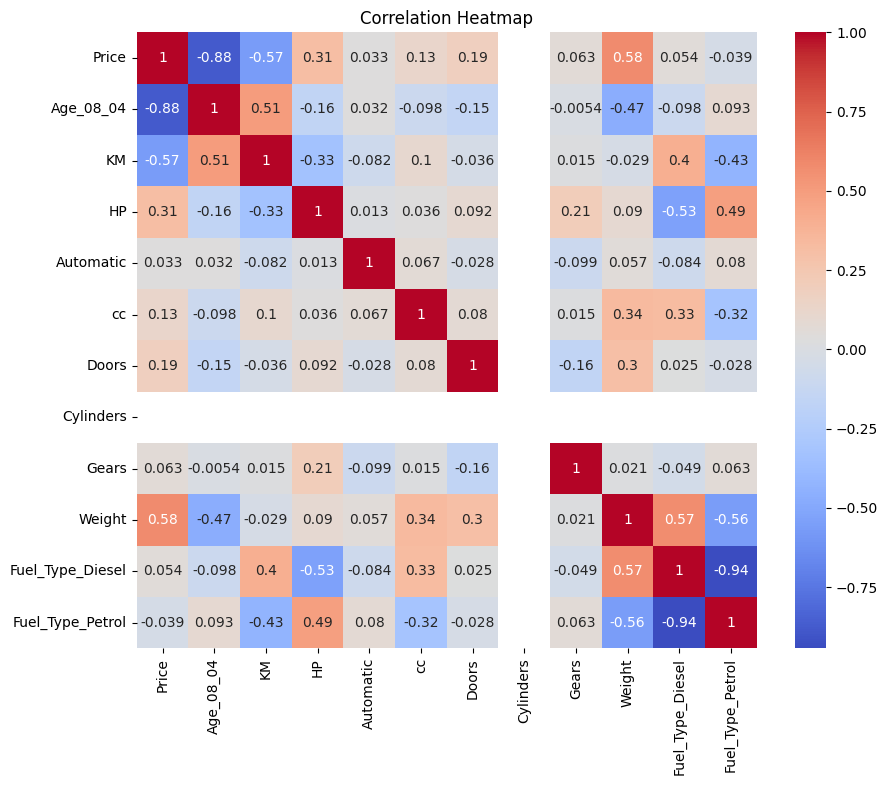

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation heatmap
# Convert 'Fuel_Type' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)  # Assuming 'Fuel_Type' is the problematic column

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Task 2: Splitting the Dataset into Training and Testing Sets
We’ll split the dataset into training and testing sets. You already preprocessed the Fuel_Type column using one-hot encoding, so now we proceed with defining the feature matrix (X) and target variable (y).

Explanation:
* We drop the Price column from the features because that’s our target variable.
* We split the data into 80% training and 20% testing sets to build and evaluate the model.


In [6]:
from sklearn.model_selection import train_test_split

# Define the feature variables (X) and target variable (y)
# Use relevant columns for the features and 'Price' as the target
X = df.drop(columns=['Price'])  # Dropping 'Price' to use as features, assuming 'Price' is the target
y = df['Price']  # Assuming 'Price' is the target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (1148, 11)
Testing set size: (288, 11)


#Task 3: Building the Multiple Linear Regression Model
We’ll build a multiple linear regression model using the training data and evaluate it on the test data.

Explanation:
* LinearRegression(): This function initializes the model.
* fit(): The model is trained on the training set (X_train, y_train).
* predict(): After training, we make predictions on the test set (X_test).
* Evaluation: We calculate the Mean Squared Error (MSE) to measure prediction accuracy and the R-squared value to check how well the features explain the variance in the target variable.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 2203043.8231437025
R-squared: 0.8348888040611082


#Task 4: Applying Lasso and Ridge Regression
We’ll now apply regularization techniques, namely Lasso and Ridge regression, to improve model performance.

Explanation:
* Lasso Regression: We apply Lasso to shrink some coefficients, which can also help with feature selection.
* Ridge Regression: Ridge adds a penalty to large coefficients to reduce overfitting.
* Evaluation: We compute the MSE and R-squared for both Lasso and Ridge to compare them with the standard linear regression model.

In [8]:
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso regression
lasso_model = Lasso(alpha=1.0)  # Adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso - Mean Squared Error: {lasso_mse}")
print(f"Lasso - R-squared: {lasso_r2}")

# Apply Ridge regression
ridge_model = Ridge(alpha=1.0)  # Adjust the alpha parameter as needed
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge - Mean Squared Error: {ridge_mse}")
print(f"Ridge - R-squared: {ridge_r2}")


Lasso - Mean Squared Error: 2195387.2460865397
Lasso - R-squared: 0.8354626403967389
Ridge - Mean Squared Error: 2199746.3702333407
Ridge - R-squared: 0.8351359377712335
